# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to me as a machine learning expert for assistance in selecting the best crop for his field. They've provided me with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, I will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [ ]:
# All required libraries are imported here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [145]:
print(crops.isna().sum()) #checking no. of missing values in each column
print(crops.dtypes) 
non_numeric_cols = crops.select_dtypes(exclude= np.number).columns.tolist() #creating the list of columns that are non-numeric
print(f"The non-numeric columns: {non_numeric_cols}")

N       0
P       0
K       0
ph      0
crop    0
dtype: int64
N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object
The non-numeric columns: ['crop']


In [151]:
X_train, X_test, y_train, y_test =train_test_split(crops.drop('crop',axis=1), crops['crop'], random_state=42, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape ,y_test.shape)


(1760, 4) (440, 4) (1760,) (440,)


In [ ]:
from sklearn.metrics import f1_score
#choose f1 score as an evaluation metric

features = crops.columns.tolist()
features.remove('crop')

f1score=[]
logreg = LogisticRegression(max_iter=2000, multi_class='multinomial')
for feature in features:
    logreg.fit(X_train[[feature]], y_train) #fitting each feature separately with target class
    y_pred = logreg.predict(X_test[[feature]])
    f1 = f1_score(y_test,y_pred, average='weighted') #calculating f1score of each feature
    
    f1score.append(f1)
    
print(f1score)

[0.10507916708090527, 0.10457380486654515, 0.2007873036107074, 0.04532731061152114]


N     37.297925
P     33.228169
K     51.078128
ph     0.773445
dtype: float64

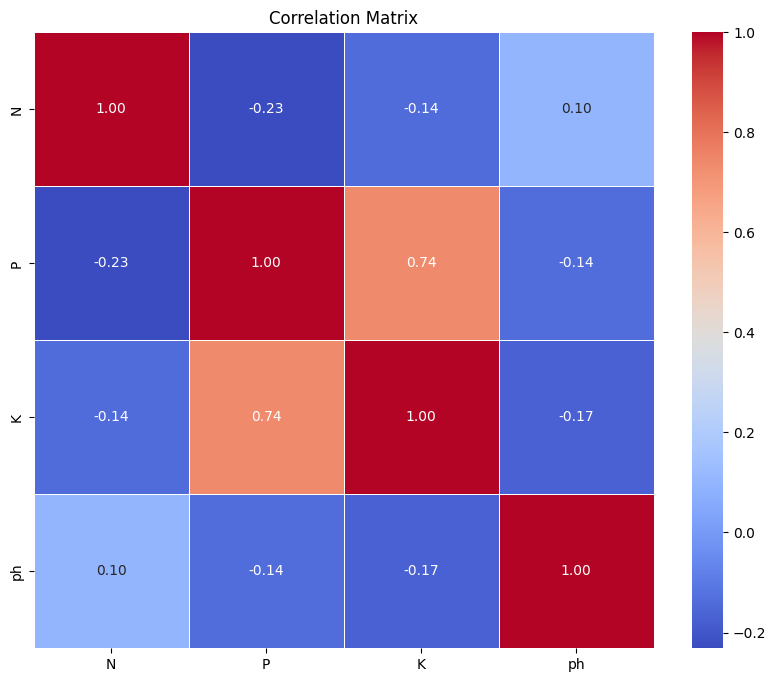

In [148]:
correlation_matrix = crops.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [149]:
threshold = 0.7  # Adjusting the threshold

# Find pairs of features with correlation above the threshold
highly_correlated_pairs = np.where(np.abs(correlation_matrix) > threshold)
print(np.abs(correlation_matrix))
print(highly_correlated_pairs)


# Exclude diagonal entries and duplicate pairs
correlated_features = []
for i in range(len(highly_correlated_pairs[0])):
    row_index = highly_correlated_pairs[0][i]
    col_index = highly_correlated_pairs[1][i]
#    print(row_index, col_index)
    
    if(row_index!=col_index and row_index>col_index):
        print("Selected rows and columns are\n", row_index, col_index)
        feature_pair = (crops.columns[row_index], crops.columns[col_index])
        correlated_features.append(feature_pair)
        
# Alternative way:
#for i, j in zip(*highly_correlated_pairs):
#    if i != j and i < j:
#        feature_pair = (crops.columns[i], crops.columns[j])
#        correlated_features.append(feature_pair)
        

print("\nHighly correlated feature pairs:")
for feature_pair in correlated_features:
    feature1, feature2 = feature_pair
    print(feature1, feature2)

           N         P         K        ph
N   1.000000  0.231460  0.140512  0.096683
P   0.231460  1.000000  0.736232  0.138019
K   0.140512  0.736232  1.000000  0.169503
ph  0.096683  0.138019  0.169503  1.000000
(array([0, 1, 1, 2, 2, 3]), array([0, 1, 2, 1, 2, 3]))
Selected rows and columns are
 2 1

Highly correlated feature pairs:
K P


In [150]:
# Selecting the three features for the final model w.r.t highest F1 score and selecting one of two highly correlated features
final_features= ['N', 'K', 'ph']

X_train, X_test, y_train, y_test =train_test_split(crops[final_features], crops['crop'], test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape ,y_test.shape)

log_reg = LogisticRegression(max_iter=2000 ,multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average='weighted')
print(f'Final model F1-score: {model_performance}')


(1760, 3) (440, 3) (1760,) (440,)
Final model F1-score: 0.5335457431335452
